本文介绍了一种基于激励的需求响应方案的实施。DR计划提供两种类型的服务。第一种对应于一天中每个小时的可控电源的断开。第二个是需求高峰削减操作。针对DR程序，描述了所提优化问题的参数、变量、目标函数和约束条件。最后，在五个用户组的参与下，对每个服务进行了测试，并显示了它们对能源需求曲线的影响

In [ ]:
#Calling the necessary libraries 
#导入要用到的软件包
import  random
import numpy as np #NumPy 是一个运行速度非常快的数学库，主要用于数组计算，包含：一个强大的N维数组对象 ndarray；广播功能函数；整合 C/C++/Fortran 代码的工具线性代数、傅里叶变换、随机数生成等功能
import scipy.io #SciPy 包含的模块有最优化、线性代数、积分、插值、特殊函数、快速傅里叶变换、信号处理和图像处理、常微分方程求解和其他科学与工程中常用的计算。
import matplotlib.pyplot as plt #Matplotlib 可以绘制线图、散点图、等高线图、条形图、柱状图、3D 图形、甚至是图形动画等等。
import pandas as pd #Pandas 一个强大的分析结构化数据的工具集，基础是 Numpy（提供高性能的矩阵运算）。可以从各种文件格式比如 CSV、JSON、SQL、Microsoft Excel 导入数据。可以对各种数据进行运算操作，比如归并、再成形、选择，还有数据清洗和数据加工特征。
from matplotlib import rc #导入模块成员
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']}) #matplotlib.pyplot.rc()函数用于设置rc参数。
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
%matplotlib inline  


##参数
P_i个用户同意在一天中每个小时通过 DR 聚合器减少的最大可管理功率值（公式 1）。其中P_1,P_2,P_3...P_n对应于每个用户i在特定的一天内可以为减少消耗贡献的可管理功率的数量。$${P_i} = \left[ {{P_1},{P_2},{P_3},...,{P_N}} \right] \cdots  \cdots (1)$$
计算每个用户的可管理能力（公式2）
$${P_i} = \frac{{DDVV{P_{i,m}}}}{{720}} \cdots  \cdots (2)$$
DDVVP_i,m是用户 i 的已验证自愿断开连接的需求，以月份 m 为单位，它被视为计算断开连接的最终需求，它的计算由(公式3)实现。
$$DDVV{P_{i,m}} = \left( {CM{E_{i,m - 12}} \times \left( {1 + e} \right)} \right) - M{e_{i,m}} \cdots  \cdots (3)$$

其中CME_i,m-12为用户i在m - 12月份的月用电量，单位为kWh。这将是前一年m月份的消费

e为平均误差,等于0.05

Me_i,m是用户i在第m个月的商业前沿中测得的能源量。数值720表示每个月的总小时数

CF_i是每天管理用户i的固定成本，单位为美元。

CV_i,h为用户i每天每小时所提供服务的可变成本，单位为美元/ k W。

D_h为每小时的功率需求，k W。它是指网络操作员的功率要求DR聚合器在一天中的每一小时以千瓦时为单位减少。这种需求可以给出每小时或只有在特定的时刻，如高峰时间。

能量减少请求通过第二天每小时的功率减少向量( k W )进行结构化。作为示例，将向量形式m称为小时削减需求向量，如式( 4 )所示。$${{\rm{D}}_h} = {\left[ {{D_1},{D_2},{D_3},...,{D_{24}}} \right]^T}$$

其中D_1,D_2,D_3,...,D_24是一天中每个小时的功率降低需求。

KMAX_i是用户一天中能够参与处理一次降功率需求的最大次数。此参数在用户和DR聚合器之间进行结算。

##变量

为了满足每小时降功率的要求，聚合商可以在任意时刻决定一个用户或一组用户"可以参与"或"不参与"。这个决定将用一个指示器Z_i,h来表示，当某个用户在h小时内没有被包含在请求中时取值为0，当用户参与请求时取值为1
$${Z_{{\rm{i,h}}}} = \left\{ {\begin{array}{*{20}{c}}
{1,{\rm{I}}f{\rm{ }}the{\rm{ }}resources{\rm{ }}of{\rm{ }}user{\rm{ }}I{\rm{ }}are{\rm{ }}not{\rm{ }}used{\rm{ }}within{\rm{ }}h{\rm{ }}hours}\\
{0,If{\rm{ }}the{\rm{ }}resources{\rm{ }}of{\rm{ }}user{\rm{ }}I{\rm{ is }}used{\rm{ in h hours}}\begin{array}{*{20}{c}}
{\begin{array}{*{20}{c}}
{}&{}
\end{array}}&{}
\end{array}}
\end{array}} \right.$$
P_ih显示用户 i 参与小时 h 的功率的变
量，以 kW 表示

## 目标函数
$$\min \sum\nolimits_h^{24} {\sum\nolimits_i^N {\left[ {C{F_i}*{Z_{ih}} + C{V_{ih}}*{P_{ih}}} \right]} }  \cdots  \cdots (5)$$
第一个限制与每小时需求的覆盖范围有关(公式6 )。
$$\sum\nolimits_{i = 1}^N {{P_{ih}} \ge {D_h}} \cdots  \cdots (6)$$
第二个限制是指在被请求参与DR程序的情况下，每个用户的最大未插拔功率限制(公式7 )。
$$0 \le {P_{ih}} \le {P_i}*{Z_{ih}} \cdots  \cdots (7)$$
第三个限制涉及用户在一天中可以参与DR计划的最大次数(方程8 )。
$$\sum\nolimits_{h = 1}^{24} {{Z_{ih}}}  \le KMA{X_i} \cdots  \cdots (8)$$

每个用户每天只能参与有限的次数。 配电网络运营商向DR聚合器执行一个请求，以便在收到请求后的第二天协调某些用户的能耗减少。 这个事务方案称为day ahead。 DR聚合器利用通过聚合器组装的有限用户组的可管理电源资源来满足减少需求。

为了评估程序对网络运营商命令的响应需求的行为，开发了如下算法：
1. 输入参与 DR 程序的用户的特征参数。
2. 网络运营商收到断电请求。
3. 一天中特定时间参与次数不超过KMAXi的用户。
4. 对每个用户的可用资源的验证是针对每个请求的小时进行的。在这一点上，可以观察到用户在特定小时内计算的可管理功率。
5. 选择那些具有足够可管理能力并以最小成本满足所需需求的用户。
6. 报价发送给网络运营商，并确定相
应的服务付款

In [ ]:
N=30#粒子数量
I=10#用户个数
H=24#小时数
T=30#迭代次数
GG=0#第二种最优判断判断位
gb_2=0#第二种最优判断得到的最优价格
g_2=np.zeros((H,I),dtype=int)##存放最优位置第二种最优判断
CF_i=np.array([0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2])#是每天管理用户i的固定成本
CV_ih=np.array([0.07,0.08,0.10,0.10,0.06,0.06,0.05,0.06,0.07,0.08])#为用户i每天每小时所提供服务的可变成本
KMAX_i=np.array([3,4,3,4,4,3,3,4,4,4])#是用户一天中能够参与处理一次降功率需求的最大次数
P_ih=np.array([10,20,20,60,40,90,40,20,60,40])#显示用户 i 参与小时 h 的功率的变量
D_h=np.array([20,20,20,10,10,30,30,20,20,40,42,20,30,20,30,20,10,10,30,30,30,20,20,20]).reshape(24,1)#为每小时的功率降低需求
D_h_high=np.array([0,0,0,0,80,100,110,100,90,10,48,10,0,0,0,0,0,10,100,80,90,100,78,0]).reshape(24,1)#高峰的每小时的功率降低需求
Power=np.array([146,120,135,170,260,290,345,310,280,223,255,232,225,190,205,218,221,233,340,300,315,280,262,200])
Z_i_h=np.zeros((N,H,I),dtype=int)#是否参加功率降低，1表示参加；0表示不参。
V=np.zeros((N,H,I),dtype=int)#粒子群算法的速度
x=np.zeros((N,H,I),dtype=int)#是否参加功率降低，1表示参加；0表示不参。
v=np.zeros((N,H,I),dtype=int)#粒子群算法的速度
bestval=np.zeros(N)#存放个体最优价格
bestval=9999#最优解初始化
g=np.zeros((H,I),dtype=int)#存放最优解的位置
gb=9999#最优价格
def limit_1(n,h):#约束条件一
  '''约束条件一

  Arguments:
      n -- 第n个粒子
      h -- 该粒子的第h行（第h个小时）

  Returns:
      如果满足约束条件返回1
  '''  
  out=0
  if np.matmul(P_ih,Z_i_h[n,h,...].reshape(10,1)) >= D_h_high[h]:#利用矩阵内积实现系数和变量值相乘求和
    out=1
  return out

def limit_2(n,h,i):
  '''约束条件二(好像是一定满足的)

  Arguments:
      n -- 第n个粒子
      h -- _description_
      i -- 该粒子的第i列(第i个用户)

  Returns:
      如果满足约束条件返回1
  '''  
  out=0
  if P_ih <= Pi*Z_i_h[i,h]:
    out=1
  return out

def limit_3(n,i):
  '''约束条件三

  Arguments:
      n -- 第n个粒子
      i -- 该粒子的第i列(第i个用户)

  Returns:
      如果满足约束条件返回1
  '''  
  out=0
  if sum(Z_i_h[n,...,i]) <= KMAX_i[i]:
    out=1
  return out

def  target_function(n,ZX):
  '''目标函数(求解最小值)

  Arguments:
      n -- 第n个粒子

  Returns:
      返回该粒子位置对应的价格
  '''
  sum1=0
  for i in range(H):
    for j in range(I):
      sum1+=(CF_i[j]*ZX[n,i,j])+(CV_ih[j]*P_ih[j])
  return sum1


In [ ]:

def init_x_v(n,h, i,V_max, V_min):
    '''初始化种群每个粒子的位置和速度

    Arguments:
        n -- 粒子总数量
        d -- 粒子种基因个数(维度)
        V_max -- 速度最大值
        V_min -- 速度最小值

    Returns:
        population -- 种群位置
        vi -- 种群速度
    ''' 
    #初始化种群位置 - 在三维数组中随机产生0或1
    population =np.zeros((n,h,i), dtype = int)
    for i1 in range(n):
        for j1 in range(h):
            for k1 in range(i):
                population[i1,j1,k1]=np.random.randint(0, 2)#随机产生0或1
                #满足限制条件则生成随机数，否则设为0
                if ((np.matmul(P_ih,population[i1,j1,...].reshape(10,1)) -D_h_high[j1])<=1)&(sum(population[i1,...,k1]) <= KMAX_i[k1]):
                    pass
                else:
                    population[i1,j1,k1]=0

                
    #初始化种群速度 - 在三维数组中随机产生         
    vi=np.zeros((n,h,i), dtype = int)
    for i2 in range (n):
        for j2 in range (h):
            for k2 in range(i):
                vi[i2,j2,k2] = random.random() * (V_max - V_min) + V_min	 
    
    return population,vi

def fitness(ZX):
    '''适应度计算

    Arguments:
        n -- 群体粒子个数

    Returns:
         fitvalue 每一个粒子的适应度列表
    ''' 
    fitvalue = np.zeros(N)#
    fit = np.zeros(N)
    for i in range (N):
        NO=1#约束条件标志位：1位满足 0为不满足
        fitvalue[i]=target_function(i,ZX)#计算降低功率需求价格
        # for it in range(H):
        #     for jt in range(I):
        #         fitvalue[i]+=(CF_i[jt]*Z_i_h[i,it,jt])+(CV_ih[jt]*P_ih[jt])
        for li1 in range (H):#约束条件1判断
            if limit_1(i,li1)==0:
                NO=0
        for li3 in range (I):#约束条件3判断
            if limit_3(i,li3)==0:
                NO=0 
        # if NO==1:
        #     fitvalue[i]=0
        #     fit[i]=0
        # else:
        #     fit[i]=100/fitvalue[i]
                   
    return fitvalue,fit

def update_pbest(p,fitvalue ):
    '''更新个体最优

    Arguments:
        p -- 当前种群位置
        fitvalue -- 当前每个粒子的适应度

    Returns:
        更新Z_i_h(所有最佳粒子位置)和bestval(所有最佳粒子价格)
    '''
    for i in range (N):
        if bestval[i] > fitvalue[i]:
            bestval[i] = fitvalue[i]#更新种群位置
            Z_i_h[i] = p[i]#更新种群位置
    return 0

def update_gbest ():
    '''更新全局最优解

    Arguments:
        gbest -- 全局最优
        g -- 全局最优解

    Returns:
         gb -- 全局最优
         g -- 全局最优对应的位置
    '''
    global g,gb,GG,gb_2,g_2
    best=np.zeros((N,24))
    for i1 in range(N):
        for j1 in range(H):
            for k1 in range(I):
                if ((np.matmul(P_ih,Z_i_h[i1,j1,...].reshape(10,1)) -D_h_high[j1])<=10):#&((np.matmul(P_ih,Z_i_h[i1,j1,...].reshape(10,1)) -D_h_high[j1])>0):
                    best[i1,j1]=1
    
    for i in range (N):
        if bestval[i] < gb:
            gb = bestval[i]
            g = Z_i_h[i]
        if sum (best[i])>GG:
            GG=sum (best[i])
            gb_2 = bestval[i]
            g_2 = Z_i_h[i]            
    
    return 0

def update_v(  c1, c2, vmax, vmin):
    '''更新速度
global v
    Arguments:
        pbest -- 个体最优解(二维列表)
        g -- 全局最优解(一维列表)
        c1 -- 个体学习率
        c2 -- 社会学习率
        vmax -- 最大速度
        vmin -- 最小速度

    Returns:
        更新后的速度二维列表
    '''
    for k in range (N):
        for i in range (H):
            for j in range (I):
                v[k,i,j]=v[k,i,j]+c1*np.random.random()*-(Z_i_h[k,i,j]-x[k,i,j]) + c2*np.random.random()*-(g[i,j]-x[k,i,j])
                if v[k,i,j] < vmin:
                    v[k,i,j] = vmin
                if v[k,i,j] > vmax:
                    v[k,i,j] = vmax
    return 0
    # vi=np.zeros((N,H,I), dtype = int)
    # vi=v
    # for k in range (N):
    #     for i in range (H):
    #         for j in range (I):
    #             vi[k][i][j]=v[k][i][j]+c1*np.random.random()*(Z_i_h[k][i][j]-x[k][i][j]) + c2*np.random.random()*(gb[j]-x[k][i][j])
    #             if vi[k][i][j] < vmin:
    #                 vi[k][i][j] = vmin
    #             if vi[k][i][j] > vmax:
    #                 vi[k][i][j] = vmaxp
    # v[0,0,0]=v[0,0,0]+
    # return 0

def update_x():
    '''更新位置(离散二进制PSO)

    Arguments:
        x -- 更新前的x
        v -- 更新后的v
        m -- 粒子数量
        n -- 粒子维度

    Returns:
        更新后的x
    '''
    xxx=np.zeros((N,H,I))
    for k in range(N):
        for i in range (H):
            for j in range(I):
                a = random.random()
                xxx[k,i,j] =1/(1+np.exp(-v[k,i,j]))
                if xxx[k,i,j] > a:
                    x[k,i,j] = 1 
                else:
                    x[k,i,j] = 0
    return x
#mian()
if __name__ == '__main__':
    c1 = 1.5  # 个体学习率
    c2 = 1.5  # 社会学习率
    W_max = 0.8  # 惯性权重最大值
    W_min = 0.4  # 惯性权重最小值
    V_max = 10  # 速度最大值
    V_min = -10  # 速度最小值
    Z_i_h , V= init_x_v(N,H,I,V_max,V_min)  # 初始化x
    bestval,fit_Z = fitness(Z_i_h)  # 计算第一次迭代的适应度
    update_gbest()  # 同理，寻找第一代的全局最优     
    print(bestval)
    print(gb)
    for j in range(T):
        # update_v( c1, c2, V_max, V_min)
        # x=update_x()
        x , v= init_x_v(N,H,I,V_max,V_min)
        fv,fit_Z = fitness(x)  # 计算第一次迭代的适应度
        update_pbest(x,fv)
        update_gbest()  # 同理，寻找第一代的全局最优  
    print(bestval)
    print(gb)
    
    #print(g)

[693.6 693.4 693.6 693.6 694.  693.6 693.2 693.  693.6 693.4 693.4 693.8
 693.  693.4 693.2 693.2 693.4 693.8 693.8 693.  693.4 693.6 694.  693.8
 694.  693.4 693.4 694.  693.2 693.6]
693.0000000000003
[692.8 692.8 693.  693.  693.2 693.  693.  693.  693.  693.2 692.8 693.
 693.  693.  693.2 693.2 693.  693.  693.  693.  693.2 693.  693.  693.
 692.8 693.2 692.6 693.2 693.2 693. ]
692.6000000000003


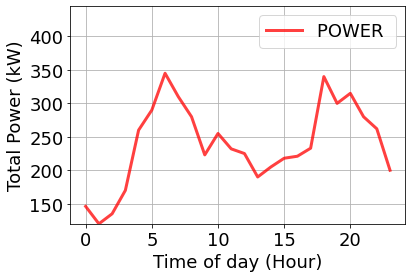

In [ ]:
# Visualizing power
#原始数据显示++++++++++++++++++++++++++++++++++++++++++
ax = plt.subplot(111)#在总画布上创建窗口（1号位置）
#等价于plt.subplot(nrows=1, ncols=3, index=1)在总画布上划分成1x3的网格从到上到右下依次编号1-n

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()    

   
  
# plt.plot(G[0,:],color='g',label='Power availability',linewidth=3)
plt.plot(Power,color='r',label='POWER ',linewidth=3,alpha=0.75)#设置画图的颜色，线宽和透明度并且画图
plt.grid(True) #设置显示网格   
plt.ylabel('Total Power (kW)',fontsize=18)#设置Y轴标题和字体大小
plt.xlabel('Time of day (Hour)',fontsize=18)#设置X轴标题和字体大小
# plt.legend(fontsize=15,loc='best')
plt.ylim(np.min(Power),np.max(Power)+100)#设置Y轴的上下限
plt.xticks(np.arange(0, 25, 5))#设置X轴的坐标轴
plt.xticks(fontsize=18) #设置X轴字体大小   
plt.yticks(fontsize=18) #设置Y轴字体大小 
plt.legend(fontsize=18,loc='best')#在轴上放置图例




In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[126. 100. 115. 160. 250. 260. 315. 290. 260. 183. 213. 212. 195. 170.
 175. 198. 211. 223. 310. 270. 285. 260. 242. 180.]


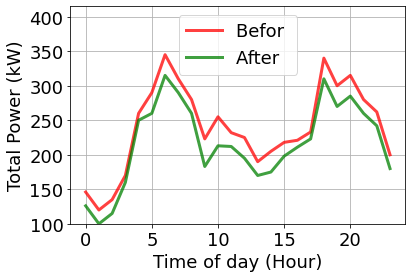

In [ ]:
#计算进行功率消减后的功率++++++++++++++++++++++++++++++++++++++++++
After_1=np.zeros(24)
for i in range(24):
    After_1[i]=Power[i]-D_h[i]
print(After_1)
#第一次对比数据数据显示++++++++++++++++++++++++++++++++++++++++++
ax = plt.subplot(111)#在总画布上创建窗口（1号位置）
#等价于plt.subplot(nrows=1, ncols=3, index=1)在总画布上划分成1x3的网格从到上到右下依次编号1-n

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()    

plt.plot(Power,color='r',label='Befor ',linewidth=3,alpha=0.75)#设置画图的颜色，线宽和透明度并且画图
plt.plot(After_1,color='g',label='After ',linewidth=3,alpha=0.75)#设置画图的颜色，线宽和透明度并且画图
plt.grid(True) #设置显示网格   
plt.ylabel('Total Power (kW)',fontsize=18)#设置Y轴标题和字体大小
plt.xlabel('Time of day (Hour)',fontsize=18)#设置X轴标题和字体大小
# plt.legend(fontsize=15,loc='best')
plt.ylim(np.min(After_1),np.max(After_1)+100)#设置Y轴的上下限
plt.xticks(np.arange(0, 25,5))#设置X轴的坐标轴
plt.xticks(fontsize=18) #设置X轴字体大小   
plt.yticks(fontsize=18) #设置Y轴字体大小 
plt.legend(fontsize=18,loc='best')#在轴上放置图例

[146. 120. 135. 170. 210. 200. 245. 220. 190. 223. 235. 232. 225. 190.
 205. 218. 221. 233. 260. 300. 235. 190. 222. 200.]
[0. 0. 0. 0. 3. 3. 3. 3. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 2. 0. 2. 1. 1. 0.]
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0 0]
 [1 1 0 1 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 1]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 1 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


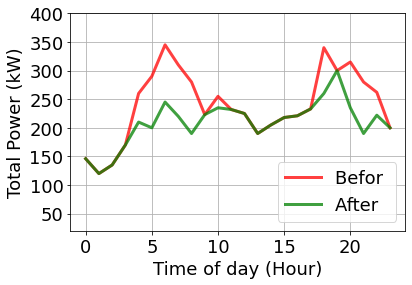

In [ ]:
After_2=np.zeros(24)
UU=np.zeros(24)
for i in range(24):
    After_2[i]=Power[i]-np.matmul(P_ih,g_2[i,...].reshape(10,1))
    UU[i]=sum(g_2[i,...])
print(After_2)
print(UU)
print(g_2)
ax = plt.subplot(111)#在总画布上创建窗口（1号位置）
#等价于plt.subplot(nrows=1, ncols=3, index=1)在总画布上划分成1x3的网格从到上到右下依次编号1-n

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()    

   
  
# plt.plot(G[0,:],color='g',label='Power availability',linewidth=3)
plt.plot(Power,color='r',label='Befor ',linewidth=3,alpha=0.75)#设置画图的颜色，线宽和透明度并且画图
plt.plot(After_2,color='g',label='After ',linewidth=3,alpha=0.75)#设置画图的颜色，线宽和透明度并且画图
plt.grid(True) #设置显示网格   
plt.ylabel('Total Power (kW)',fontsize=18)#设置Y轴标题和字体大小
plt.xlabel('Time of day (Hour)',fontsize=18)#设置X轴标题和字体大小
# plt.legend(fontsize=15,loc='best')
plt.ylim(np.min(After_2)-100,np.max(After_2)+100)#设置Y轴的上下限
plt.xticks(np.arange(0, 25,5))#设置X轴的坐标轴
plt.xticks(fontsize=18) #设置X轴字体大小   
plt.yticks(fontsize=18) #设置Y轴字体大小 
plt.legend(fontsize=18,loc='best')#在轴上放置图例